In [1]:
# Standard library imports
import numpy as np
import pandas as pd
import os
import logging
from os.path import dirname as up
import torch

# Important paths
code_dir = up(os.getcwd())
deep_cal_dir = up(up(os.getcwd()))

# Problem-specific libraries
from sklearn.linear_model import LinearRegression
from pricing_model import call_option_brent
from pricing.heston_fourier import price_heston_fourier
from pricing.heston_mc import price_heston_mc
from tqdm.notebook import tqdm
from pricing.liftedheston import Pricer_Lifted_Heston
from pricing.brent_iv import call_BS
from pricing.linear_iv import linear
from pricing.newton_iv import newton_raphson

# Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

def set_style():

    sns.set_context("paper")

    sns.set(font='serif')
    
    sns.set_style("white", {
        "font.family": "serif",
        "font.serif": ["Times", "Palatino", "serif"]
    })
    
set_style()
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [2]:
input_ = []
heston_output = []
prediction = []
S = tqdm(np.arange(0.7,1.31,0.1), desc="S")
for i in S:
    for j in np.linspace(0.5,1.,10):
        #c = price_heston_fourier(K_=i,alpha_=1.,r_=0.02,tau_=j,kappa_=1.5,S0_=1,theta_=0.1,rho_=-0.05,sigma_=0.3,V0_=0.1,L_=1000) # # ρ=-0.05, κ=1.5, γ=0.3, v ̄=0.1, v0=0.1 and r=0.02,
        #c = price_heston_mc(kappa_=2,theta_=0.04,sigma_=0.5,rho_=-0.7,r_=0.05,T_=j,L_=100,V0_=0.04,S0_=1,K0_=i,N_=1000)
        c = Pricer_Lifted_Heston(K_=i,r_=0.05,S0=1,T=j,rho=-0.05,lamb=1.5,nu=0.3,theta=0.1,V0=0.1,N=20,rN=2.5,alpha=0.6,M=200,L_=50)  # K_,r_,S0,T,rho,lamb,theta,nu,V0,N,rN,alpha,M,L_
        heston_output.append(c)
        input_.append([i,j,c]) 




In [3]:
input_[1][2][0]

0.297980187433025

In [11]:
import scipy as scp
brent_output = [] # 1.,1,0.02,j,1.5,i,0.1,-0.05,0.3,0.1,50
for i in input_ :
    brent_ = newton_raphson(1,i[0],0.05,i[1],linear(1,i[0],0.05,i[1],i[2][0])+0.001 ,i[2][0], 1e-2) 
    #brent_ = newton_raphson(S_=i[0],K_=1,r_=0.05,tau_=i[2], sigma0_=1 ,price_=i[1], epsilon_=1e-8)
    brent_output.append([i[0],i[1],brent_])
brent_output = np.array(brent_output)


KeyboardInterrupt: 

In [5]:
brent_output[1,2]

-0.2634143115304642

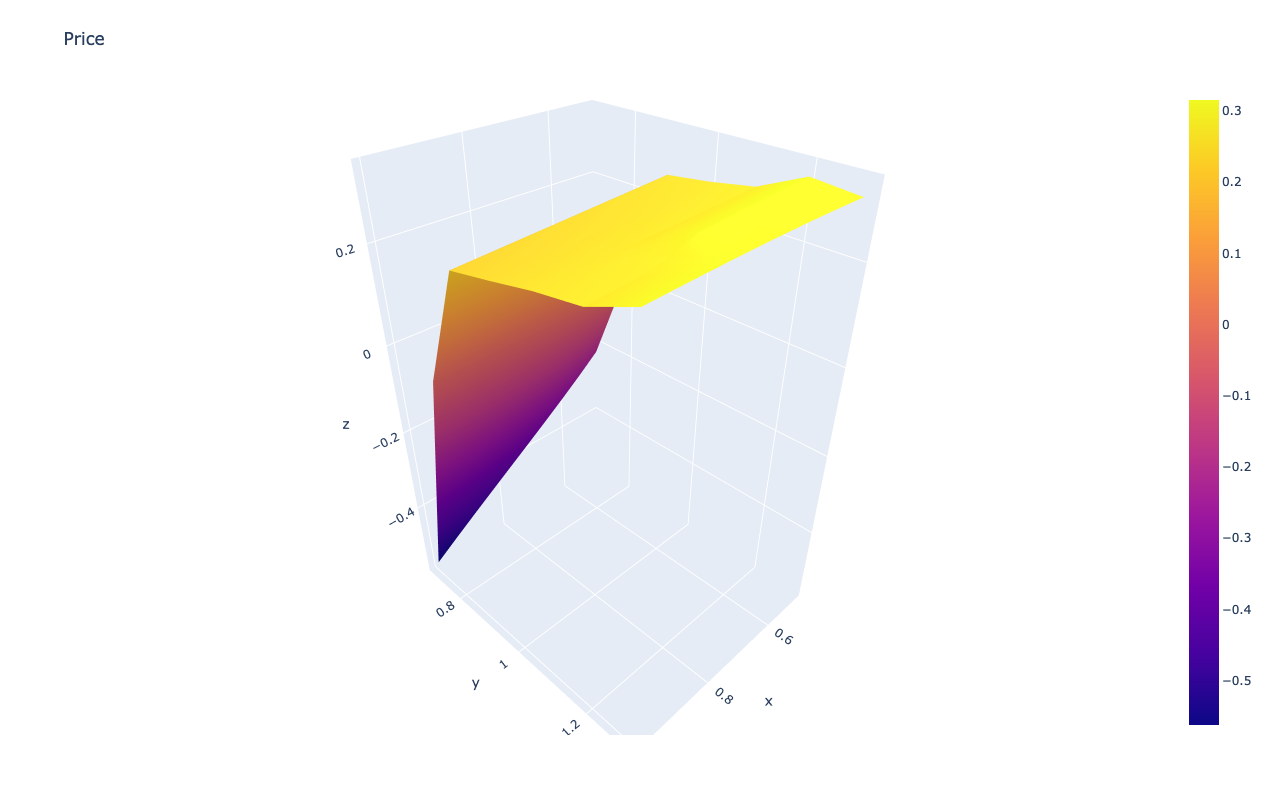

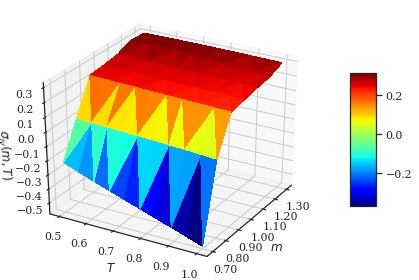

In [8]:
import scipy


def plot_iv_surface(log_moneyness, maturity, iv, azim, elev, name):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    ax.azim = azim
    ax.elev = elev
    
    ax.set_xlabel('$m$')
    ax.set_ylabel('$T$')
    ax.set_zlabel('$\sigma_{iv}(m, T)$')

#     ax.yaxis.set_ticks(np.linspace(0, 0.2, 4, endpoint=False))
#     ax.xaxis.set_ticks(np.linspace(-0.1, 0.28, 8, endpoint=True))
    ax.invert_xaxis()

    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
    
    surf = ax.plot_trisurf(log_moneyness, 
                    maturity, 
                    iv,linewidth=0., antialiased=False, cmap = plt.cm.jet)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    #ax.plot_surface(log_moneyness, maturity, iv)
    plt.tight_layout()
    fig.savefig(name)
    


#x, y = np.log(np.arange(0.5,1.6,0.01)),np.linspace(0.1,2.,110)
#xx, yy = np.meshgrid(brent_output[:,0], brent_output[:,1], sparse=False)
#delaunay_features = scipy.spatial.Delaunay(brent_output[:,:2])
#print(delaunay_features)
#interp = scipy.interpolate.LinearNDInterpolator(delaunay_features, brent_output[:,2],fill_value=0.325)
#x,y=interp(np.meshgrid(x, y, sparse=False))
plot_iv_surface(brent_output[:,0],brent_output[:,1], brent_output[:,2], 30, 30, 'test.png')
x, y = np.linspace(7,13,7)/10, np.linspace(.5,1.,10)
fig = go.Figure(data=go.Surface(x=y, y=x, z=np.reshape(brent_output[:,2],(7,10))))
fig.update_layout(title='Price', autosize=False,width=800, height=800,margin=dict(l=65, r=50, b=65, t=90))

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:TriSurface   [x,y,z]
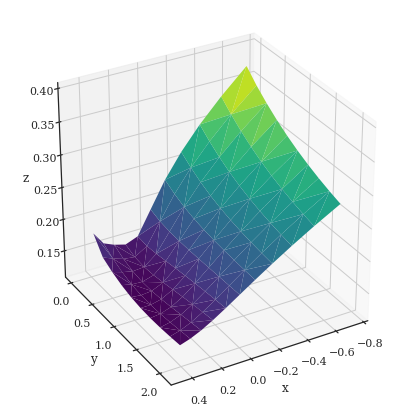

In [18]:
import holoviews as hv
hv.extension('matplotlib')
hv.TriSurface((np.log(brent_output[:,0]),brent_output[:,1],brent_output[:,2])).opts(linewidth=0.,azimuth=60, elevation=30, fig_size=200)